In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

## Glass type classification
This exercise is based on the [Glass Identification Data Set from UCI](https://archive.ics.uci.edu/ml/datasets/glass+identification) which contains data about 214 samples of glass of different types (window, bottles, light bulbs etc.). The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence ... if it is correctly identified!

### The columns
 - 'Type' - type of glass
 - 'RI' - Refractive index (how much a ray is bent when entering the glass)
 - Concentration of 7 Different chemical elements:
   Na, Mg, Al, Si, K, Ca, Ba, Fe
   
You can read more about glass composition [here](https://www.cmog.org/article/chemistry-glass)

In [3]:
df = pd.read_csv('glass.csv')
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

#### Take a look at descriptive statistics 

In [4]:
df.describe().T

count       mean       std       min        25%       50%        75%  \
RI    214.0   1.518365  0.003037   1.51115   1.516523   1.51768   1.519157   
Na    214.0  13.407850  0.816604  10.73000  12.907500  13.30000  13.825000   
Mg    214.0   2.684533  1.442408   0.00000   2.115000   3.48000   3.600000   
Al    214.0   1.444907  0.499270   0.29000   1.190000   1.36000   1.630000   
Si    214.0  72.650935  0.774546  69.81000  72.280000  72.79000  73.087500   
K     214.0   0.497056  0.652192   0.00000   0.122500   0.55500   0.610000   
Ca    214.0   8.956963  1.423153   5.43000   8.240000   8.60000   9.172500   
Ba    214.0   0.175047  0.497219   0.00000   0.000000   0.00000   0.000000   
Fe    214.0   0.057009  0.097439   0.00000   0.000000   0.00000   0.100000   
Type  214.0   2.780374  2.103739   1.00000   1.000000   2.00000   3.000000   

           max  
RI     1.53393  
Na    17.38000  
Mg     4.49000  
Al     3.50000  
Si    75.41000  
K      6.21000  
Ca    16.19000  
Ba     3.15000  
Fe     0.51000  
Type   7.00000

#### Find the range (max - min) of values for each chemical element. Which elements would you expect to dominate the calculated distances between the samples?

In [5]:
print("Column value ranges:\n")

for i in range(df.shape[1]):
    print("The range for " + (str)(df.columns[i]) + " is " + (str)(df[df.columns[i]].max() - df[df.columns[i]].min()))
        

Column value ranges:

The range for RI is 0.022780000000000022
The range for Na is 6.649999999999999
The range for Mg is 4.49
The range for Al is 3.21
The range for Si is 5.599999999999994
The range for K is 6.21
The range for Ca is 10.760000000000002
The range for Ba is 3.15
The range for Fe is 0.51
The range for Type is 6


#### There are 7 types of glass, but we will group them into 2 groups - windows glass and everything else

In [6]:
df['iswindow'] = (df.Type <=4).astype(int)

df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type  iswindow
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1         1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1         1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1         1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1         1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1         1

#### How many of window and non-window glass samples are there?

In [7]:
df.iswindow.size

214

#### Take a look at the histograms for some of the chemical elements

Text(0.5,0,'Si oxide as weight percent')

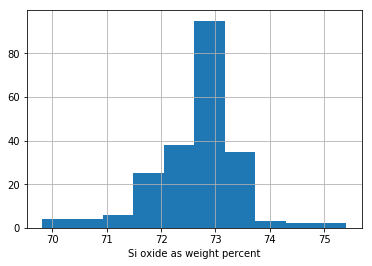

In [8]:
# [Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

element = 'Si'
df[element].hist()
plt.xlabel(element + ' oxide as weight percent')

#### Try different couples of parameters on the following plot and see how well (or not) they allow to visually distinguish between the window and non-windows glass

In [9]:
# ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']# ['RI', 
sns.relplot('Al', 'Na', hue='iswindow', data=df)

AttributeError: module 'seaborn' has no attribute 'relplot'

## Train a kNN classifier

#### Define the X and y variables for training
 - y - the 'iswindow' column
 - X - All the chemical elements and 'RI'

In [10]:
y = df.iswindow

In [11]:
X = df.iloc[:,:9]
X

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00
5    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00
7    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00
8    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11
10   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24
11   1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00
12   1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24
13   1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.00  0.17
14   1.51763  12.61  3.59  1.31  73.29  0.58  8.50  0.00  0.00
15   1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.00  0.00
16   1.51784  12.68  3.67  1.16  73.11  0.61  8.70  0.00  0.00
17   1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.00  0.00
18   1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.00  0.00
19   1.51735  13.02  3.54  1.69  72.73  0.54  8.44  0.00  0.07
20   1.51750  12.82  3.55  1.49  72.75  0.54  8.52  0.00  0.19
21   1.51966  14.77  3.75  0.29  72.02  0.03  9.00  0.00  0.00
22   1.51736  12.78  3.62  1.29  72.79  0.59  8.70  0.00  0.00
23   1.51751  12.81  3.57  1.35  73.02  0.62  8.59  0.00  0.00
24   1.51720  13.38  3.50  1.15  72.85  0.50  8.43  0.00  0.00
25   1.51764  12.98  3.54  1.21  73.00  0.65  8.53  0.00  0.00
26   1.51793  13.21  3.48  1.41  72.64  0.59  8.43  0.00  0.00
27   1.51721  12.87  3.48  1.33  73.04  0.56  8.43  0.00  0.00
28   1.51768  12.56  3.52  1.43  73.15  0.57  8.54  0.00  0.00
29   1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.00  0.00
..       ...    ...   ...   ...    ...   ...   ...   ...   ...
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00
185  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00
186  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00
187  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00
188  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00
189  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00
190  1.51613  13.88  1.78  1.79  73.10  0.00  8.67  0.76  0.00
191  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09
192  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09
193  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08
194  1.51683  14.56  0.00  1.98  73.29  0.00  8.52  1.57  0.07
195  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05
196  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01
197  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00
198  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00
199  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00
200  1.51508  15.15  0.00  2.25  73.50  0.00  8.34  0.63  0.00
201  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00
202  1.51514  14.85  0.00  2.42  73.72  0.00  8.39  0.56  0.00
203  1.51658  14.80  0.00  1.99  73.11  0.00  8.28  1.71  0.00
204  1.51617  14.95  0.00  2.27  73.30  0.00  8.71  0.67  0.00
205  1.51732  14.95  0.00  1.80  72.99  0.00  8.61  1.55  0.00
206  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38  0.00
207  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88  0.00
208  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00

[214 rows x 9 columns]

#### Import the KNeighborsClassifier class (look up the right submodule)

In [99]:
# from ??? import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Create an instance of the classifier with k set to 3

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)

#### Train (fit) the classifier

In [102]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Find the predictions for all of X

In [104]:
y_pred = knn.predict(X)

#### Find what faction of the predictions are correct

In [106]:
(y_pred == y).sum() / len(y)

0.9719626168224299

#### The above fraction of correct predictions is called accuracy score and can also be found using the sklearn.metrics.accuracy_score() function

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y, y_pred)

0.9719626168224299

#### Create a knn classifier for each k in range between 1 and 30 and plot the resulting accuracy scores as a function of k
 - Why do you think the accuracy score is 1 for k=1 ?

Text(0,0.5,'Accuracy Score')

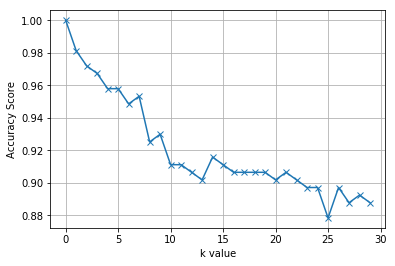

In [152]:
scores = []
k = []

for i in range(30):
    knn2 = KNeighborsClassifier(n_neighbors = i + 1)
    knn2.fit(X, y)
    y_pred2 = knn2.predict(X)
    score = accuracy_score(y, y_pred2)
    scores.append(score)
    k.append(i)
    
plt.plot(k, scores, '-x')
plt.grid()
plt.xlabel("k value")
plt.ylabel("Accuracy Score")

## Setting some data aside for testing

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
# The train_test_split() function splits the data into training and testing
# Training data will be used in fit() and testing to evaluate the preidction
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

#### Take a look at the shapes of the resulting data frames

In [142]:
X_train.shape, y_train.shape
# X_test.shape, y_test.shape

((128, 9), (128,))

#### Repeat the plot of accuracy score vs k but now using the split data

Text(0,0.5,'Accuracy Score')

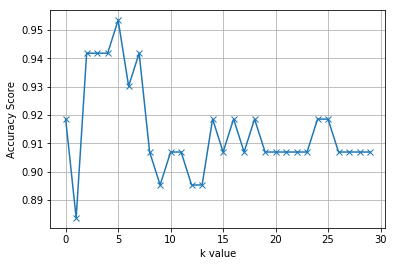

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

tts_scores = []
k = []

for i in range(30):
    knn3 = KNeighborsClassifier(n_neighbors = i + 1)
    knn3.fit(X_train, y_train)
    y_pred3 = knn3.predict(X_test)
    tts_score = accuracy_score(y_test, y_pred3)
    tts_scores.append(tts_score)
    k.append(i)

plt.plot(k, tts_scores, '-x')
plt.grid()
plt.xlabel("k value")
plt.ylabel("Accuracy Score")

#### Try changing the `random_state` in `train_test_split` and rerun the loop and the plot. Observe how different the plot is each time

Text(0,0.5,'Accuracy Score')

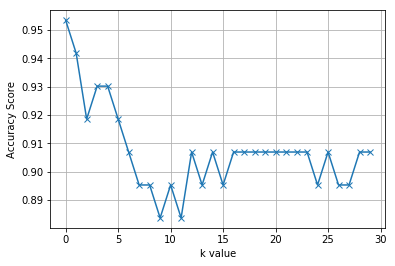

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=3)

tts_scores = []
k = []

for i in range(30):
    knn3 = KNeighborsClassifier(n_neighbors = i + 1)
    knn3.fit(X_train, y_train)
    y_pred3 = knn3.predict(X_test)
    tts_score = accuracy_score(y_test, y_pred3)
    tts_scores.append(tts_score)
    k.append(i)

plt.plot(k, tts_scores, '-x')
plt.grid()
plt.xlabel("k value")
plt.ylabel("Accuracy Score")

Text(0,0.5,'Accuracy Score')

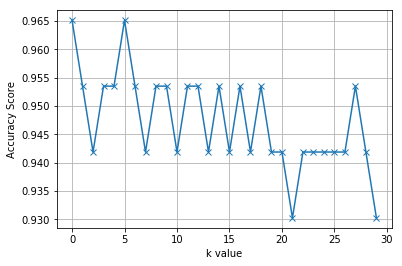

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

tts_scores = []
k = []

for i in range(30):
    knn3 = KNeighborsClassifier(n_neighbors = i + 1)
    knn3.fit(X_train, y_train)
    y_pred3 = knn3.predict(X_test)
    tts_score = accuracy_score(y_test, y_pred3)
    tts_scores.append(tts_score)
    k.append(i)

plt.plot(k, tts_scores, '-x')
plt.grid()
plt.xlabel("k value")
plt.ylabel("Accuracy Score")

#### Try using a DecisionTreeClassifier instead of kNN and repeat the accuracy score plot

Text(0,0.5,'Accuracy Score')

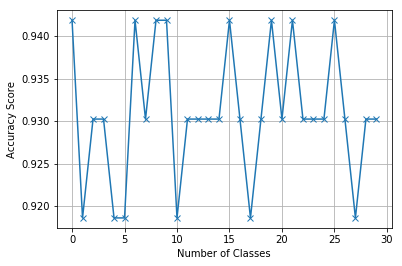

In [161]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

tts_scores = []
k = []

for i in range(30):
    dtc = DecisionTreeClassifier()
    dtc.n_classes_ = i
    dtc.fit(X_train, y_train)
    y_pred3 = dtc.predict(X_test)
    tts_score = accuracy_score(y_test, y_pred3)
    tts_scores.append(tts_score)
    k.append(i)

plt.plot(k, tts_scores, '-x')
plt.grid()
plt.xlabel("Number of Classes")
plt.ylabel("Accuracy Score")